https://gitter.im/ShapeWorks/ShapeWorks?source=orgpage

python /home/global/ShapeWork51/examples/ellipsoid/ellipsoidMain.py --interactive 1 --start_with_prepped_data 1

In [1]:
import os,sys
import argparse
import nibabel as nib
import numpy as np
import nrrd
from nibabel.freesurfer.mghformat import load
from zipfile import ZipFile
import csv

from GroomUtils import *
from OptimizeUtils import *
from AnalyzeUtils import *

for struct in (['''LeftPutamen''','''RightCaudate''','''LeftCaudate''','''LeftHippocampus''','''RightPutamen''','''RightHippocampus''','''LeftThalamus''','''LeftThalamus''']):
    installpath = "/home/global/ShapeWork531/bin"
    os.environ["PATH"] = installpath + ":" + os.environ["PATH"]
    #repertoire à modifier pour la sortie 
    parentDir="/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV2/"
    if not os.path.exists(parentDir):
        os.makedirs(parentDir)  
    print("/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/"+struct+"/G[1234]_*_"+struct+".nii")
    fileList = sorted(glob.glob("/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/"+struct+"/G[1234]_*_"+struct+".nii"))

    parentDir = parentDir+'/PrepOutput/'+struct
    if not os.path.exists(parentDir):
        os.makedirs(parentDir)

    for ima in fileList :
        img = nib.load(ima)
        nrrd.write(ima.replace(".nii",".nrrd"), np.asanyarray(img.get_fdata()))

    fileList = sorted(glob.glob("/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/"+struct+"/G[1234]_*"+struct+".nrrd"))
    print(fileList)
    resampledFiles = applyIsotropicResampling(parentDir+"/resampled",fileList,recenter=True,isBinary=True)
    paddedFiles = applyPadding(parentDir+ "/padded", resampledFiles, 10)
    comFiles = applyCOMAlignment(parentDir+ "/com_aligned", paddedFiles)
    centerFiles = center(parentDir + "/centered", comFiles)
    medianFile = FindReferenceImage(centerFiles)
    rigidFiles = applyRigidAlignment(parentDir, centerFiles, None,medianFile,processRaw = False)

    croppedFiles = applyCropping(parentDir, rigidFiles,None,processRaw=False)
    dtFiles = applyDistanceTransforms(parentDir, croppedFiles)    

    pointDir = parentDir+'/PointFiles/'
    if not os.path.exists(pointDir):
        os.makedirs(pointDir)

    parameterDictionary = {
        "starting_particles" : 64,
        "number_of_particles" : 512,
        "number_of_levels" : 4, 
        "use_normals": 0,
        "normal_weight": 10.0,
        "checkpointing_interval" : 200,
        "keep_checkpoints" : 0,
        "iterations_per_split" : 400,
        "optimization_iterations" : 400,
        "starting_regularization" : 1000,
        "ending_regularization" : 1,
        "recompute_regularization_interval" : 2,
        "domains_per_shape" : 1,
        "relative_weighting" : 10,
        "initial_relative_weighting" : 0.01,
        "procrustes_interval" : 0,
        "procrustes_scaling" : 0,
        "save_init_splits" : 0,
        "debug_projection" : 0,
        "mesh_based_attributes" : 0,
        "verbosity" : 3
    }

    """
    Now we execute a multi-scale (or single-scale) particle optimization function.
    """
    [localPointFiles, worldPointFiles] = runShapeWorksOptimize_MultiScale(pointDir, dtFiles, parameterDictionary)
    #[localPointFiles, worldPointFiles] = runShapeWorksOptimize_SingleScale(pointDir,dtFiles, parameterDictionary)

    #launchShapeWorksStudio(pointDir, dtFiles, localPointFiles, worldPointFiles)

/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G[1234]_*_LeftPutamen.nii
['/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_380304JM130613_LeftPutamen.nrrd', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_420901MW051213_LeftPutamen.nrrd', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_430702JG100214_LeftPutamen.nrrd', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_460829CC090913_LeftPutamen.nrrd', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_490128JBD171013_LeftPutamen.nrrd', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_491029AS010813_LeftPutamen.nrrd', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_500425EF100314_LeftPutamen.nrrd', '/NAS/


########### Resampling ###############
('Input Filename : ', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_380304JM130613_LeftPutamen.nrrd')
('Output Filename : ', '/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV2//PrepOutput/LeftPutamen/resampled/G1_sub_380304JM130613_LeftPutamen.isores.nrrd')
######################################

Calling cmd:
shapeworks read-image --name /NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_380304JM130613_LeftPutamen.nrrd antialias isoresample --isospacing 1.0 binarize recenter-image write-image --name /NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV2//PrepOutput/LeftPutamen/resampled/G1_sub_380304JM130613_LeftPutamen.isores.nrrd


CalledProcessError: Command '['shapeworks', 'read-image', '--name', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_380304JM130613_LeftPutamen.nrrd', 'antialias', 'isoresample', '--isospacing', '1.0', 'binarize', 'recenter-image', 'write-image', '--name', '/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV2//PrepOutput/LeftPutamen/resampled/G1_sub_380304JM130613_LeftPutamen.isores.nrrd']' returned non-zero exit status 127.

In [14]:
for idx,test in enumerate(fileList):
    print(idx)
    if idx-2 >= 5:
        break
    

    

0
1
2
3
4
5
6
7


In [169]:
try:
    resampledFiles = applyIsotropicResampling(parentDir+"/resampled",fileList,recenter=True,isBinary=True)
except ValueError:
    print("Oops!  That was no valid number.  Try again...")


########### Resampling ###############
('Input Filename : ', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_100269SD100714_LeftPutamen.nrrd')
('Output Filename : ', '/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV//PrepOutput/LeftPutamen/resampled/G1_sub_100269SD100714_LeftPutamen.isores.nrrd')
######################################

Calling cmd:
shapeworks read-image --name /NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_100269SD100714_LeftPutamen.nrrd antialias isoresample --isospacing 1.0 binarize recenter-image write-image --name /NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV//PrepOutput/LeftPutamen/resampled/G1_sub_100269SD100714_LeftPutamen.isores.nrrd


CalledProcessError: Command '['shapeworks', 'read-image', '--name', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_100269SD100714_LeftPutamen.nrrd', 'antialias', 'isoresample', '--isospacing', '1.0', 'binarize', 'recenter-image', 'write-image', '--name', '/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV//PrepOutput/LeftPutamen/resampled/G1_sub_100269SD100714_LeftPutamen.isores.nrrd']' returned non-zero exit status 127.


########### Resampling ###############
('Input Filename : ', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_100269SD100714_LeftPutamen.nrrd')
('Output Filename : ', '/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV//PrepOutput/LeftPutamen/resampled/G1_sub_100269SD100714_LeftPutamen.isores.nrrd')
######################################

Calling cmd:
shapeworks read-image --name /NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_100269SD100714_LeftPutamen.nrrd antialias isoresample --isospacing 1.0 binarize recenter-image write-image --name /NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV//PrepOutput/LeftPutamen/resampled/G1_sub_100269SD100714_LeftPutamen.isores.nrrd


CalledProcessError: Command '['shapeworks', 'read-image', '--name', '/NAS/dumbo/protocoles/CogPhenoPark/CortThick_Quentin/Shape/Data_Groupes/LeftPutamen/G1_sub_100269SD100714_LeftPutamen.nrrd', 'antialias', 'isoresample', '--isospacing', '1.0', 'binarize', 'recenter-image', 'write-image', '--name', '/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV//PrepOutput/LeftPutamen/resampled/G1_sub_100269SD100714_LeftPutamen.isores.nrrd']' returned non-zero exit status 127.

In [149]:
parameterDictionary = {
    "starting_particles" : 16,
    "number_of_particles" : 16,
    "number_of_levels" : 1, 
    "use_normals": 0,
    "normal_weight": 10.0,
    "checkpointing_interval" : 200,
    "keep_checkpoints" : 0,
    "iterations_per_split" : 4,
    "optimization_iterations" : 4,
    "starting_regularization" : 5000,
    "ending_regularization" : 0.1,
    "recompute_regularization_interval" : 2,
    "domains_per_shape" : 1,
    "relative_weighting" : 10,
    "initial_relative_weighting" : 0.01,
    "procrustes_interval" : 0,
    "procrustes_scaling" : 0,
    "save_init_splits" : 0,
    "debug_projection" : 0,
    "mesh_based_attributes" : 0,
    "verbosity" : 3
}
pointDir="/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV/PrepOutput/G1234/PointFiles/"
dtFiles = sorted(glob.glob("/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV//PrepOutput/G1234/distance_transforms/G[1234]*_LeftCaudate.isores.pad.com.center.aligned.cropped.tpSmoothDT.nrrd"))
del dtFiles[82:83]
#[localPointFiles, worldPointFiles] = runShapeWorksOptimize_MultiScale(pointDir,dtFiles, parameterDictionary)
[localPointFiles, worldPointFiles] = runShapeWorksOptimize_SingleScale(pointDir,dtFiles, parameterDictionary)

/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV/PrepOutput/G1234/PointFiles/correspondence_1024.xml


KeyboardInterrupt: 

In [ ]:


    meanDir   = parentDir+'/MeanReconstruction/'
    if not os.path.exists(meanDir):
        os.makedirs(meanDir)

    parameterDictionary = {
        "number_of_particles" : 128,
        "out_prefix" : meanDir + 'ellipsoid',
        "do_procrustes" : 0,
        "do_procrustes_scaling" : 0,
        "levelsetValue" : 0.0,
       "targetReduction" : 0.0,
       "featureAngle" : 30,
       "lsSmootherIterations" : 1,
       "meshSmootherIterations" : 1,
       "preserveTopology" : 1,
       "qcFixWinding" : 1,
       "qcDoLaplacianSmoothingBeforeDecimation" : 1,
       "qcDoLaplacianSmoothingAfterDecimation" : 1,
       "qcSmoothingLambda" : 0.5,
       "qcSmoothingIterations" : 3,
       "qcDecimationPercentage" : 0.9,
       "normalAngle" : 90,
       "use_tps_transform" : 0,
       "use_bspline_interpolation" : 0,
       "display" : 0,
       "glyph_radius" : 1
    }

    runReconstructMeanSurface(dtFiles, localPointFiles, worldPointFiles, parameterDictionary)

    meshDir_local   = parentDir+'/MeshFiles-Local/'
    if not os.path.exists(meshDir_local):
        os.makedirs(meshDir_local)

    """
    Parameter dictionary for ReconstructSurface cmd tool.
    """
    parameterDictionary = {
        "number_of_particles" : 128,
        "mean_prefix" : meanDir + 'ellipsoid',
        "out_prefix" : meshDir_local + 'ellipsoid', 
        "use_tps_transform" : 0,
        "use_bspline_interpolation" : 0,
        "display" : 0,
        "glyph_radius" : 1
    }

    localDensePointFiles = runReconstructSurface(localPointFiles, parameterDictionary)

    meshDir_global   = parentDir+'/MeshFiles-World/'
    if not os.path.exists(meshDir_global):
        os.makedirs(meshDir_global)

    """
    Parameter dictionary for ReconstructSurface cmd tool.
    """
    parameterDictionary = {
        "number_of_particles" : 128,
        "mean_prefix" : meanDir + 'ellipsoid',
        "out_prefix" : meshDir_global + 'ellipsoid',
        "use_tps_transform" : 0,
        "use_bspline_interpolation" : 0,
        "display" : 0,
        "glyph_radius" : 1
    }

    worldDensePointFiles = runReconstructSurface(worldPointFiles, parameterDictionary)

    pcaDir   = parentDir+'/PCAModesFiles/'
    if not os.path.exists(pcaDir):
        os.makedirs(pcaDir)

    """
    Parameter dictionary for ReconstructSamplesAlongPCAModes cmd tool.
    """
    parameterDictionary = {
        "number_of_particles" : 128,
        "mean_prefix" : meanDir + 'ellipsoid',
        "out_prefix" : pcaDir + 'ellipsoid', 
        "use_tps_transform" : 0,
        "use_bspline_interpolation" : 0,
        "display" : 0,
        "glyph_radius" : 1,
        "maximum_variance_captured" : 0.95,
        "maximum_std_dev" : 2,
        "number_of_samples_per_mode" : 10
    }

    runReconstructSamplesAlongPCAModes(worldPointFiles, parameterDictionary)

    print("\nStep 9. Analysis - Launch ShapeWorksView2 - sparse correspondence model.\n")
    print(pointDir, dtFiles, localPointFiles, worldPointFiles)
    #launchShapeWorksView2(pointDir, dtFiles, localPointFiles, worldPointFiles)
    print("\nShapeworks Pipeline Complete!")

ANOVA sur les diff des 4 groupes 

In [97]:
NR_POINTS=256*3
G1=np.empty([NR_POINTS,1])
for it in glob.iglob('/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV/PrepOutput/G1234/PointFiles/256/G1_*_LeftCaudate.isores.pad.com.center.aligned.cropped.tpSmoothDT_world.particles') :
    data = np.loadtxt(it)
    G1=np.concatenate((G1, data.reshape(NR_POINTS,1)),axis=1)

G2=np.empty([NR_POINTS,1])
for it in glob.iglob('/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV/PrepOutput/G1234/PointFiles/256/G2_*_LeftCaudate.isores.pad.com.center.aligned.cropped.tpSmoothDT_world.particles') :
    data = np.loadtxt(it)
    G2=np.concatenate((G2, data.reshape(NR_POINTS,1)),axis=1)

G3=np.empty([NR_POINTS,1])
for it in glob.iglob('/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV/PrepOutput/G1234/PointFiles/256/G3_*_LeftCaudate.isores.pad.com.center.aligned.cropped.tpSmoothDT_world.particles') :
    data = np.loadtxt(it)
    G3=np.concatenate((G3, data.reshape(NR_POINTS,1)),axis=1)

G4=np.empty([NR_POINTS,1])
for it in glob.iglob('/NAS/dumbo/protocoles/CogPhenoPark/ShapeWork_by_RV/PrepOutput/G1234/PointFiles/256/G4_*_LeftCaudate.isores.pad.com.center.aligned.cropped.tpSmoothDT_world.particles') :
    data = np.loadtxt(it)
    G4=np.concatenate((G4, data.reshape(NR_POINTS,1)),axis=1)

In [125]:
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import numpy as np

In [126]:
pvalues = np.zeros(NR_POINTS)
statsval = np.zeros(NR_POINTS)
for jdx in range(NR_POINTS):
    values_A = G1[jdx,:].tolist()
    values_B = G2[jdx,:].tolist()
    values_C = G3[jdx,:].tolist()
    values_D = G4[jdx,:].tolist()
    statsval[jdx], pvalues[jdx] = stats.kruskal(values_A,values_B,values_C,values_D)

[  0  12  18  35  38  38  52  71  95 100 116 129 130 131 146 154 159 160
 167 167 172 173 182 186 192 203 210 220 231 252]


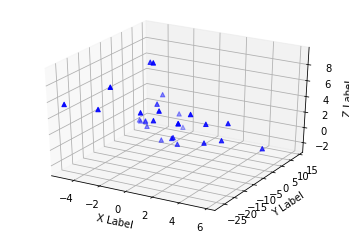

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(data[:,0], data[:,1], data[:,2], c='r', marker='o')
#pvalues[np.where(pvalues<0.05)]
#np.extract(pvalues<0.05,pvalues)
selX,selY=np.where(pvalues.reshape(256,3)<0.05)
print(selX)
ax.scatter(data[selX,0], data[selX,1], data[selX,2], c='b', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()